# Data driven building energy modeling using AI. 

---

![Energy Efficiency Certificate Example](figs/Cover1.jpg)




## Background: What's the point of modeling building enerygy use?

Below are key use cases with real research examples:

- **Forecast energy demand**  
  [LSTM for building energy forecasting](https://www.sciencedirect.com/science/article/pii/S0306261921003736) – Predicts hourly use in office buildings.

- **Detect anomalies**  
  [Clustering to find abnormal energy use](https://doi.org/10.1016/j.energy.2016.03.105) – Flags energy waste or faults.

- **Assess retrofit savings**  
  [Tree-based modeling for retrofit impact](https://doi.org/10.1016/j.enbuild.2018.04.054) – Estimates savings from upgrades.

- **Support policy design**  
  [EPC data for policy analysis](https://doi.org/10.1016/j.enpol.2020.111653) – Evaluates incentive effectiveness.

- **Control smart buildings**  
  [Reinforcement learning for HVAC](https://doi.org/10.1016/j.enbuild.2019.06.007) – Optimizes real-time energy use.

---

## Background: Building Energy Performance Certificates

**Energy Performance Certificates (EPCs)** are standardized documents that rate the energy efficiency of a building on a scale (typically from **A** — most efficient, to **G** — least efficient). They provide a snapshot of a building's energy performance, estimated energy consumption, and CO₂ emissions.

EPCs are widely used across Europe and other regions to:
- Inform **buyers, renters, or building managers** about expected energy costs. [[1]](https://doi.org/10.1016/j.eneco.2014.12.012)
- Encourage **energy-efficient renovations**  `
- Serve as **regulatory tools** for compliance with national energy policies  

An EPC typically includes:
- The building's **energy rating**  
- **Estimated energy use** and fuel costs  
- **Recommendations** for improving efficiency  

These certificates play a crucial role in benchmarking building performance and are increasingly being used in **AI-driven models** to enhance forecasting, retrofitting strategies, and policy design.

In [1]:

# It's common to import all libraries at the beginning of a python script, howver in a notebook, it's better to import libraries as needed to avoid loading unnecessary libraries.
    
import warnings
warnings.filterwarnings("ignore")


# Case study: Catalonia Building Energy-Efficiency Certificates (EPC) Dataset  
*Open Data Catalonia · Catalan Energy Institute (ICAEN)*  

---

##  Context and Motivation  
Energy use in buildings is one of the European Union’s largest climate-mitigation levers.  
- **2002 → 2010 → 2012 Directives** (EPBD 2002/91/EC, recast 2010/31/EU, EED 2012/27/EU) made **Energy Performance Certificates (EPCs)** mandatory for all real-estate transactions.  
- **Spain** transposed the EPBD in **2007** for new builds (RD 47/2007) and in **2013** for the existing stock (RD 235/2013).  
- Since **1 June 2013** every new, sold, or rented dwelling in **Catalonia** must be rated from **A (best) to G (worst)** for both energy use and CO₂ emissions.  

Catalonia’s EPC register has therefore become an unparalleled longitudinal record of building-stock efficiency, retrofit uptake, and renewable-system diffusion.

---


## Methodolgy: Import Dataset

The first step is to import the dataset and have a look around to see what it contains. The dataset is a CSV file, and we will use the `pandas` library to read it. Pandas is a powerful library for data manipulation and analysis in Python.

- [Getting Started Tutorials (Pandas)](https://pandas.pydata.org/docs/getting_started/index.html)
- [Kaggle – Pandas Course](https://www.kaggle.com/learn/pandas)
- [YouTube – Corey Schafer's Pandas Playlist](https://www.youtube.com/playlist?list=PL-osiE80TeTt2d9bfVyTiXJA-UTHn6WwU)


In [2]:
import pandas as pd
import os
import requests

# Define the filename and the URL to download the dataset
filename = "energy_efficiency_certificates.csv"
url = "https://analisi.transparenciacatalunya.cat/api/views/j6ii-t3w2/rows.csv?accessType=DOWNLOAD"

# Check if the file already exists locally
if not os.path.exists(filename):
    # If not, download the file from the URL
    response = requests.get(url)
    # Save the downloaded content to a local CSV file
    with open(filename, "wb") as f:
        f.write(response.content)
    # Load the CSV into a pandas DataFrame
    df_energy = pd.read_csv(filename)
else:
    # If the file exists, load it directly into a pandas DataFrame
    df_energy = pd.read_csv(filename)


# Load the schema with the English column names
schema_df = pd.read_csv('dataset_schema.csv')

# Rename columns in df_energy because the orginal is not in English
df_energy.columns = schema_df['Column Name']

## Dataset exploration

After loading the dataset we want to see what's in it. Below is a sample of the dataset, after the column names have been translated into English. The data contained in the dataset is still in Spanish.

In [3]:
df_energy

Column Name,NUM_CASE,ADDRESS,NUMBER,SCALE,APARTMENT,DOOR,POSTAL_CODE,POPULATION,REGION,NAME_PROVINCE,...,Heating energy demand,Cooling energy demand qualification,Cooling energy demand,RESIDENTIAL VENTILATION,LENGTH,LATITUDE,GEOREFERENCE,ENERGY_REHABILITATION,REHABILITATION_ACTIONS,ENTRY_DATE
0,2103STTDZ,Carrer OM,13,NaN,NaN,NaN,8650.0,Sallent,Bages,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16/04/2015
1,BHDLM04GZ,Partida CAPARRELLA,77,NaN,NaN,NaN,25192.0,Lleida,Segrià,Lleida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26/05/2015
2,L4HJTXJHF,Carrer VEREMA,4,NaN,NaN,NaN,17493.0,Vilajuïga,Alt Empordà,Girona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16/06/2015
3,0FZ88B8FX,Ronda FERRAN PUIG,17,NaN,NaN,NaN,17001.0,Girona,Gironès,Girona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/07/2015
4,R6ZGPQV7T,Camí Marganell a Montserrat,107,NaN,NaN,NaN,8298.0,Marganell,Bages,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/08/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340357,5KG95J0GL,Carrer Andreu Soler,9,NaN,4,3,8930.0,Sant Adrià de Besòs,Barcelonès,Barcelona,...,120.18,D,10.38,NaN,2.218195,41.432345,POINT (2.21819490766 41.432344774775),NO,NaN,18/07/2019
1340358,YQNLZZ0C5,Carrer COMTES DE BELL·LLOC,144,NaN,2,4,8014.0,Barcelona,Barcelonès,Barcelona,...,65.42,A,0.99,0.63,2.136314,41.382323,POINT (2.136314316302 41.382323041997),NO,NaN,21/05/2018
1340359,6LSSPS7JJ,Carrer Francesc Camprodon,83,NaN,1,1,17401.0,Arbúcies,Selva,Girona,...,42.45,B,2.42,NaN,2.517223,41.815067,POINT (2.517223165429 41.815067252326),NO,NaN,27/01/2021
1340360,2RL2YQ0LP,Carrer Igualtat,26,NaN,4,2,8902.0,Hospitalet de Llobregat (L'),Barcelonès,Barcelona,...,100.61,B,2.19,NaN,2.125328,41.360689,POINT (2.125327822606 41.36068910736),NO,NaN,07/02/2023


In [4]:
from IPython.display import display, HTML

# Displays the range of values and some stats for each column in the DataFrame. Note that the table only include fields with numeric values.
display(HTML(df_energy.describe().to_html(max_cols=None)))


Column Name,POSTAL_CODE,POPULATION_CODE,COUNTY_CODE,PROVINCE_CODE,CADASTRE_METERS,YEAR_BUILT,Non-renewable primary energy,CO2 emissions,Final energy consumption,Approximate annual energy cost per home,INSULATION VALUE,WINDOWS VALUE,CTE INSULATION VALUE,CTE WINDOWS VALUE,UTM_X,UTM_Y,Heating emissions,Cooling emissions,DHW emissions,Lighting emissions,Heating energy,Cooling energy,DHW energy,Lighting energy,Heating energy demand,Cooling energy demand,RESIDENTIAL VENTILATION,LENGTH,LATITUDE
count,1.340359e+06,1.340362e+06,1.340345e+06,1.340362e+06,1.340362e+06,315.000000,1.340268e+06,1.340273e+06,1.312985e+06,1.312985e+06,1.312985e+06,1.312985e+06,1.340362e+06,1.340362e+06,1.320747e+06,1.320747e+06,1.275623e+06,1.275622e+06,1.275623e+06,1.239765e+06,1.275622e+06,1.275502e+06,1.275622e+06,1.256570e+06,1.275626e+06,1.275309e+06,400166.000000,1.320747e+06,1.320747e+06
mean,1.474429e+04,1.447871e+04,1.969038e+01,1.435497e+01,1.406616e+02,1978.177778,2.095832e+02,4.322454e+01,1.350992e+02,8.073199e+02,1.484302e+00,1.839359e+05,4.704892e-01,2.020110e+00,4.198829e+05,4.596106e+06,2.942279e+01,1.482249e+00,1.036784e+01,9.520949e-01,1.423969e+02,8.748809e+00,5.346164e+01,5.558677e+00,9.974132e+01,8.076066e+00,0.672681,2.041323e+00,4.151126e+01
std,1.178219e+04,1.174187e+04,1.206908e+01,1.172146e+01,8.415132e+02,43.794106,2.347864e+02,1.347190e+02,1.272860e+02,9.377441e+03,7.736847e-01,4.284785e+06,7.819671e-02,3.190249e-01,4.647718e+04,3.275928e+04,1.893315e+01,1.940395e+00,1.881079e+01,8.657774e+00,8.849597e+01,1.144981e+01,1.091972e+02,5.159574e+01,4.953151e+01,8.942642e+00,0.142989,5.547672e-01,2.974310e-01
min,1.001000e+03,8.001000e+03,1.000000e+00,8.000000e+00,1.000000e+00,1400.000000,-4.821000e+01,-8.170000e+00,-1.237500e+02,-2.441690e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.687565e+05,4.489509e+06,0.000000e+00,0.000000e+00,-8.600000e-01,-1.689000e+01,0.000000e+00,-4.730000e+00,-5.060000e+00,-9.971000e+01,0.000000e+00,0.000000e+00,0.000000,2.500650e-01,4.052962e+01
25%,8.172000e+03,8.019000e+03,1.200000e+01,8.000000e+00,5.800000e+01,1968.500000,1.452500e+02,2.923000e+01,7.834000e+01,8.660000e+00,7.300000e-01,3.440000e+00,4.900000e-01,2.100000e+00,4.070238e+05,4.580660e+06,1.782000e+01,5.900000e-01,5.620000e+00,0.000000e+00,8.935000e+01,3.460000e+00,2.701000e+01,0.000000e+00,6.634000e+01,3.410000e+00,0.630000,1.879849e+00,4.137402e+01
50%,8.695000e+03,8.187000e+03,1.300000e+01,8.000000e+00,7.500000e+01,1982.000000,1.947500e+02,3.943000e+01,1.313800e+02,1.457000e+01,1.690000e+00,3.780000e+00,4.900000e-01,2.100000e+00,4.279962e+05,4.588443e+06,2.631000e+01,1.030000e+00,9.410000e+00,0.000000e+00,1.292800e+02,6.070000e+00,4.628000e+01,0.000000e+00,9.249000e+01,5.800000e+00,0.630000,2.138590e+00,4.144442e+01
75%,1.725300e+04,1.707900e+04,3.300000e+01,1.700000e+01,1.041200e+02,2003.000000,2.541500e+02,5.173000e+01,1.819200e+02,4.546900e+02,2.030000e+00,5.000000e+00,4.900000e-01,2.100000e+00,4.351719e+05,4.607609e+06,3.732000e+01,1.870000e+00,1.361000e+01,0.000000e+00,1.809100e+02,1.104000e+01,6.912000e+01,0.000000e+00,1.258500e+02,1.040000e+01,0.630000,2.223363e+00,4.161408e+01
max,5.225000e+04,4.390700e+04,4.200000e+01,4.300000e+01,3.577920e+05,2017.000000,9.653508e+04,6.039300e+04,4.006808e+04,5.300219e+06,1.000000e+02,1.000000e+08,5.600000e-01,2.300000e+00,5.244708e+05,4.745406e+06,3.543600e+03,5.824200e+02,1.222272e+04,2.652240e+03,2.091903e+04,3.438240e+03,7.215464e+04,1.565701e+04,3.622300e+03,1.573100e+03,10.000000,3.296821e+00,4.283890e+01


# Dataset description

Lets have a look at what variables are in the dataset. 

In [5]:

display(HTML(schema_df.to_html(max_rows=None, max_cols=None)))

,Column Name,Description,API Field Name,Data Type
0,NUM_CASE,Energy efficiency certificate procedure identifier,case_number,Text
1,ADDRESS,Street name,address,Text
2,NUMBER,Street number,number,Text
3,SCALE,Scale,scale,Text
4,APARTMENT,Apartment,floor,Text
5,DOOR,Door,door,Text
6,POSTAL_CODE,Postal code,postal_code,Text
7,POPULATION,Municipality (according to the table of municipalities of Catalonia from Idescat),population,Text
8,REGION,County (according to the table of counties of Catalonia and the singular territorial entity of Aran de l'Idescat),region,Text
9,NAME_PROVINCE,Province,province_name,Text


Notice the **DataType** column. Many variables in the dataset are **textual (categorical)** in nature—for example, variables like the **type of housing**, **municipality name**, or **energy certification ratings**. While these variables contain meaningful information that could significantly improve the performance of a machine learning model, they **cannot be directly processed by most algorithms**, which expect **numerical input**.

These textual data will need to be encoeded. We will get back to this later, but for now we will focus on cleaning the dataset and removing any rows with missing values.

In [6]:
# Count the number of text and number variables in schema_df
text_count = (schema_df['Data Type'].str.lower() == 'text').sum()
number_count = (schema_df['Data Type'].str.lower() == 'number').sum()

print(f"Number of text variables: {text_count}")
print(f"Number of number variables: {number_count}")

Number of text variables: 43
Number of number variables: 24


## Lets check the quality of the data - Missing values

We need to handle missing values because:

1. **They distort analysis**  
   Missing values can skew averages, correlations, and statistical summaries, leading to incorrect conclusions.

2. **Most algorithms can't handle them**  
   Many machine learning models (e.g., scikit-learn, XGBoost) will fail or behave unpredictably when encountering missing data.

3. **They may indicate data quality issues**  
   Patterns of missingness can reveal errors in data collection or problems in preprocessing.

4. **They affect grouping and aggregation**  
   Operations like group-by, pivot tables, and total counts may be inaccurate or incomplete if missing values are present.

For this case study, we'll just remove rows or cols with missing values because we have a large dataset and can afford to lose some data. In practice, you might want to use more sophisticated methods like imputation or interpolation.


In [ ]:
# Lets drop all rows with missing values in the DataFrame
# This will remove any row that has at least one missing value in any column.
all_missing_removed = df_energy.dropna()


In [ ]:
# viewing the processed DataFrame
all_missing_removed

Column Name,NUM_CASE,ADDRESS,NUMBER,SCALE,APARTMENT,DOOR,POSTAL_CODE,POPULATION,REGION,NAME_PROVINCE,...,Heating energy demand,Cooling energy demand qualification,Cooling energy demand,RESIDENTIAL VENTILATION,LENGTH,LATITUDE,GEOREFERENCE,ENERGY_REHABILITATION,REHABILITATION_ACTIONS,ENTRY_DATE


The dataset is **EMPTY**! This means that every row in the DataFrame has at least one missing value, so we will need to be smarter about how we handle missing values.

In [11]:
# We will look at the columns first to see which variables contain the most missing values. 
# If we just removed all rows with missing values, we would lose a lot of data. 

from IPython.display import display, HTML

# Calculate missing values as a percentage of total rows
total_rows = df_energy.shape[0]
missing_percentage = (df_energy.isnull().sum() / total_rows * 100).round(2) if total_rows > 0 else df_energy.isnull().sum()
missing_df = pd.DataFrame({
    'Missing Values': df_energy.isnull().sum(),
    'Missing (%)': missing_percentage
})

# Sort by missing percentage descending
missing_df = missing_df.sort_values('Missing (%)', ascending=False)

display(HTML(missing_df.to_html()))


,Missing Values,Missing (%)
Column Name,,
YEAR_BUILT,1340047,99.98
BUILDING_TECHNICAL_INSTALLATION_REPORT,1335026,99.60
REHABILITATION_ACTIONS,1322103,98.64
Lighting energy rating,1245838,92.95
Lighting emissions qualification,1245787,92.94
TYPE_TERTIARY,1218972,90.94
SCALE,1063975,79.38
RESIDENTIAL VENTILATION,940196,70.14
DOOR,389388,29.05



There's a few variables that have mostly empty values. `YEAR_BUILT` has 99.9% missing values and thus provides no value in the modeling process. We might as well remove it from the dataset.

So let's get rid of these features first. We select an arbitrary threshold of 10% missing values. If a feature has more than 10% missing values, we will remove it from the dataset.

In [12]:
# Threshold for dropping
threshold = 10.0

# Identify features with >10% missing values, sorted by missing values descending
features_to_drop = missing_df[missing_df['Missing (%)'] > threshold].sort_values('Missing Values', ascending=False)

# Display table of features to be dropped
if not features_to_drop.empty:
    display(HTML(f"<h4>Features with >{threshold}% Missing Values (sorted by missing count)</h4>"))
    display(HTML(features_to_drop.to_html()))
else:
    print(f"No features with more than {threshold}% missing values.")

# Drop the columns from the DataFrame
df_energy = df_energy.drop(columns=features_to_drop.index.tolist())


,Missing Values,Missing (%)
Column Name,,
YEAR_BUILT,1340047,99.98
BUILDING_TECHNICAL_INSTALLATION_REPORT,1335026,99.60
REHABILITATION_ACTIONS,1322103,98.64
Lighting energy rating,1245838,92.95
Lighting emissions qualification,1245787,92.94
TYPE_TERTIARY,1218972,90.94
SCALE,1063975,79.38
RESIDENTIAL VENTILATION,940196,70.14
DOOR,389388,29.05


Lets check how many rows our dataset has after removing the features with more than 10% missing values. 

In [11]:
print("Number of rows before dropping missing values:", df_energy.shape[0])
df_energy.dropna(inplace=True)  # Drop rows with missing values
print("Number of rows after dropping missing values:", df_energy.shape[0])

Number of rows before dropping missing values: 1340362
Number of rows after dropping missing values: 1121447


## Encoding Categorical or Textual Features

Machine learning models work with numbers, so we need to convert text or category labels into numerical form. This process is called **encoding**.

### Common Methods:

1. **Label Encoding**  
   - Assigns each category a unique number.  
   - Example: `{"red": 0, "green": 1, "blue": 2}`

2. **One-Hot Encoding**  
   - Creates a new column for each category and uses 0s and 1s.  
   - Example for "color":
     ```
     red   → [1, 0, 0]  
     green → [0, 1, 0]  
     blue  → [0, 0, 1]
     ```

3. **Ordinal Encoding**  
   - Used when categories have an order.  
   - Example: `{"low": 1, "medium": 2, "high": 3}`


### But there is an issue with categorical features that have too many unique values!

Categorical features with hundreds or thousands of unique values (like user IDs or building names) can cause problems:

- **High complexity**: Encoding creates a large, sparse dataset that’s hard to learn from.
- **Overfitting**: Rare categories may lead the model to memorize noise instead of learning patterns.
- **Low predictive value**: Highly specific identifiers often add little to prediction quality.

To keep models efficient and generalizable, we often drop these features **before training**.

### Read More

- [StackOverflow](https://stackoverflow.com/questions/61585507) – Practical Q&A on encoding high-cardinality features.
- [Medium Guide](https://niranjanappaji.medium.com/a-guide-to-handling-high-cardinality-in-categorical-variables-7b4101d3af68) – Clear overview of key encoding methods.
- [ApX Tutorial](https://apxml.com/courses/intro-feature-engineering/chapter-3-encoding-categorical-features/high-cardinality-features) – Step-by-step guide with examples.
- [Advanced Medium Post](https://medium.com/@adnan.mazraeh1993/handling-high-cardinality-categorical-features-from-basics-to-super-advanced-45dd9949b31b) – In-depth, practical encoding strategies.



In [12]:
# Count the number of categorical (object) and numeric variables in df_energy
text_count = (df_energy.dtypes == 'object').sum()
number_count = (df_energy.dtypes != 'object').sum()

print(f"Before encoding:\n- Number of categorical (text) variables: {text_count}\n- Number of numeric variables: {number_count}")


Before encoding:
- Number of categorical (text) variables: 29
- Number of numeric variables: 27


In [13]:
# Identify categorical columns (object dtype)
categorical_cols = [col for col in df_energy.columns if df_energy[col].dtype == 'object']

# Show only text (categorical) columns and their number of unique values
text_unique_counts = {col: df_energy[col].nunique() for col in categorical_cols}
text_unique_df = pd.DataFrame(list(text_unique_counts.items()), columns=['Column', 'Unique Values']).sort_values('Unique Values', ascending=False)
display(text_unique_df)


,Column,Unique Values
0,NUM_CASE,1121447
6,CADASTRAL REFERENCE,998374
27,GEOREFERENCE,378748
1,ADDRESS,178899
28,ENTRY_DATE,3601
2,NUMBER,1679
3,POPULATION,1139
4,REGION,65
16,Reason for certification,36
15,Certification tool,14


### Cleaning High-Cardinality Features

Looking at the table, columns like `NUM_CASE`, `CADASTRAL REFERENCE`, and `GEOREFERENCE` are just identifiers — they’re unique per row and carry little predictive value, so they’ll be dropped. Same goes for `ADDRESS`, `ENTRY_DATE`, and `NUMBER`; they introduce unnecessary variance and won’t help the model.

We’ll use a simple rule: **drop anything with more than ~11 unique values**, unless it’s clearly meaningful (like `REGION`). High-cardinality features tend to add noise, increase dimensionality, and risk overfitting — especially when the model tries to learn from rare categories.

What’s left — fields like `CLIMATIC ZONE`, `US_BUILDING`, and the various energy/emission qualifications — are low-cardinality and domain-relevant. These are ideal for encoding and will likely contribute useful patterns for training.

In [14]:
from IPython.display import display, HTML

# Identify categorical columns (object dtype)
categorical_cols = [col for col in df_energy.columns if df_energy[col].dtype == 'object']

# Count unique values for each categorical column
text_unique_counts = {col: df_energy[col].nunique() for col in categorical_cols}

# Identify categorical columns with more than 15 unique values
high_cardinality_cols = [col for col, count in text_unique_counts.items() if count > 11]

display(HTML(f"<b>Columns with more than 15 unique values:</b> {high_cardinality_cols}"))

# Drop only columns that exist in df_energy
cols_to_drop = [col for col in high_cardinality_cols if col in df_energy.columns]
df_energy = df_energy.drop(columns=cols_to_drop)

# Show remaining columns
display(HTML(f"<b>Remaining columns:</b> {df_energy.columns.tolist()}"))

Now that we’ve stripped out the noisy columns and anything with too many unique values, we can go ahead and start encoding the remaining ones.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize mapping dictionary
label_encoders = {}

# Only encode columns that exist in df_energy
for col in [c for c in categorical_cols if c in df_energy.columns]:
    le = LabelEncoder()
    df_energy[col] = le.fit_transform(df_energy[col].astype(str))
    label_encoders[col] = le

# Confirm
display(HTML(df_energy.head().to_html()))
print(f"Encoded {len(label_encoders)} columns.")


Column Name,POSTAL_CODE,NAME_PROVINCE,POPULATION_CODE,COUNTY_CODE,PROVINCE_CODE,CLIMATIC ZONE,CADASTRE_METERS,US_BUILDING,Non-renewable primary energy consumption rating,Non-renewable primary energy,Qualification of CO2 emissions,CO2 emissions,Final energy consumption,Approximate annual energy cost per home,SOLAR THERMAL,SOLAR PHOTOVOLTAIC,BIOMASS SYSTEM,GEOTHERMAL ENERGY,INSULATION VALUE,WINDOWS VALUE,CTE INSULATION VALUE,CTE WINDOWS VALUE,UTM_X,UTM_Y,Construction regulations,Procedure Type,Heating emissions qualification,Heating emissions,Cooling emissions qualification,Cooling emissions,ACS emissions qualification,DHW emissions,Lighting emissions,Heating energy qualification,Heating energy,Cooling energy qualification,Cooling energy,DHW energy qualification,DHW energy,Lighting energy,Heating energy demand qualification,Heating energy demand,Cooling energy demand qualification,Cooling energy demand,LENGTH,LATITUDE
19799,43870.0,3,43014,22.0,43,0,110.00,8,6,617.51,6,153.55,0.0,0.0,0,0,0,0,0.0,0.0,0.56,2.3,295292.01,4509681.08,7,1,5,51.88,0,0.99,5,6.90,0.0,4,196.66,1,5.86,4,26.17,0.0,4,121.93,1,6.00,0.576547,40.712623
19847,8800.0,0,8307,17.0,8,1,55.00,8,3,119.94,2,25.13,0.0,0.0,0,0,0,0,0.0,0.0,0.49,2.1,393412.24,4564142.00,7,1,4,24.04,0,0.28,6,0.81,0.0,5,113.50,0,1.67,6,4.77,0.0,6,87.75,0,1.71,1.728374,41.221647
19871,25005.0,2,25120,33.0,25,5,393.00,8,2,178.18,2,44.31,0.0,0.0,0,0,0,0,0.0,0.0,0.41,1.8,303162.01,4610457.27,6,1,4,25.09,4,3.20,6,6.25,0.0,4,118.48,6,18.89,6,29.53,0.0,4,91.60,6,19.33,0.637263,41.621568
20028,8319.0,0,8075,21.0,8,1,140.05,7,4,170.20,4,45.13,0.0,0.0,0,0,0,0,0.0,0.0,0.49,2.1,453552.50,4605352.05,7,1,4,35.07,0,0.03,4,4.86,0.0,4,165.61,0,0.16,6,22.97,0.0,4,97.30,0,0.12,2.442650,41.598521
20106,8251.0,0,8192,7.0,8,4,42.00,8,5,126.65,5,499.93,0.0,0.0,0,0,0,0,0.0,0.0,0.41,1.8,403583.00,4626532.02,1,1,3,13.73,3,2.13,4,4.49,0.0,4,81.04,4,12.58,5,21.19,0.0,3,40.65,3,6.65,1.839702,41.784784


Encoded 19 columns.


In [18]:
all_mappings = []

for col, le in label_encoders.items():
    for i, class_ in enumerate(le.classes_):
        all_mappings.append({
            'Column': col,
            'Encoded': i,
            'Original': class_
        })

mapping_df = pd.DataFrame(all_mappings)
display(mapping_df)


,Column,Encoded,Original
0,NAME_PROVINCE,0,0
1,NAME_PROVINCE,1,1
2,NAME_PROVINCE,2,2
3,NAME_PROVINCE,3,3
4,CLIMATIC ZONE,0,0
...,...,...,...
104,Cooling energy demand qualification,2,2
105,Cooling energy demand qualification,3,3
106,Cooling energy demand qualification,4,4
107,Cooling energy demand qualification,5,5


## Summary of the data processing steps

1. **Import dataset**: Downloaded and loaded the energy efficiency certificates dataset, and applied English column names using the provided schema.
2. **Initial exploration**: Explored the dataset, including descriptive statistics and value counts for key categorical features.
3. **Missing value analysis**: Calculated missing values for each feature and removed columns with more than 10% missing data.
4. **Remove rows with missing values**: Dropped all rows containing any remaining missing values to ensure a clean dataset.
5. **High cardinality feature removal**: Dropped categorical features with more than 15 unique values to reduce complexity and risk of overfitting.
6. **Categorical encoding**: Identified categorical columns and applied label encoding to convert text features into numeric codes.


These steps ensure the dataset is clean, relevant, and ready for robust machine learning analysis.

Next we can do some more exploratory data analysis (EDA) to understand the data better. We can also do some feature engineering to create new features that might be useful for our model. For now, we can split the data into training and testing sets and train a machine learning model on the training set. We can then evaluate the model on the testing set and see how well it performs.

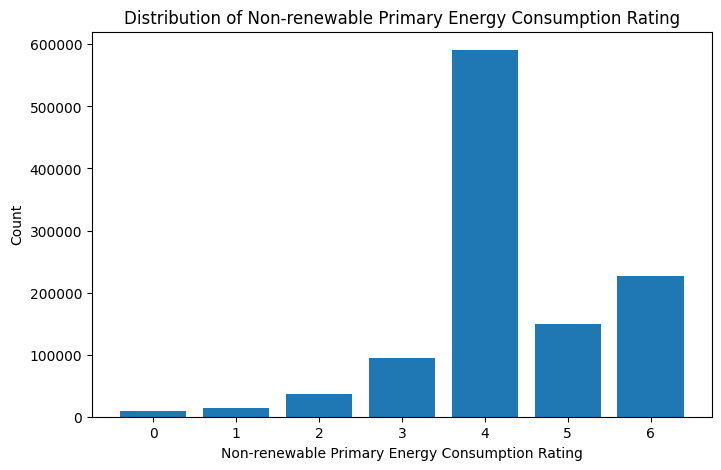

In [19]:
import matplotlib.pyplot as plt

# Get value counts for the target column
rating_counts = df_energy['Non-renewable primary energy consumption rating'].value_counts().sort_index()

# Get original label mapping from all_mappings
rating_labels = [d['Original'] for d in all_mappings if d['Column'] == 'Non-renewable primary energy consumption rating']
# Ensure order matches encoded values
rating_labels_sorted = [label for _, label in sorted(zip([d['Encoded'] for d in all_mappings if d['Column'] == 'Non-renewable primary energy consumption rating'], rating_labels))]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(rating_labels_sorted, rating_counts)
plt.xlabel('Non-renewable Primary Energy Consumption Rating')
plt.ylabel('Count')
plt.title('Distribution of Non-renewable Primary Energy Consumption Rating')
plt.show()

We can see that the output class is very imbalanced. This is a problem because most models assume balanced classes by default. If one class dominates, the model can get high accuracy just by always predicting the majority class — while completely ignoring the minority class. This leads to poor recall, biased predictions, and unreliable performance, especially for the class we care most about. 

We can use techniques like oversampling, undersampling, or SMOTE to balance the classes. But for now, we will work with the dataset as is. 

---

### Further reading on handling imbalanced datasets

1. **[Google ML Crash Course: Imbalanced Datasets](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)**  
   This guide explains how to address imbalanced datasets using techniques like downsampling and upweighting, providing practical insights into when and how to apply these methods.

2. **[GeeksforGeeks: Handling Imbalanced Data for Classification](https://www.geeksforgeeks.org/handling-imbalanced-data-for-classification/)**  
   An informative article covering various strategies such as resampling, synthetic data generation, and evaluation metrics to effectively manage imbalanced classification problems.

3. **[Analytics Vidhya: 10 Techniques to Deal with Class Imbalance](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)**  
   A comprehensive overview of practical methods including data augmentation, cost-sensitive learning, and ensemble techniques to handle class imbalance in machine learning tasks.

4. **[Medium: Class Imbalance Strategies — A Visual Guide with Code](https://medium.com/data-science/class-imbalance-strategies-a-visual-guide-with-code-8bc8fae71e1a)**  
   This visual guide illustrates common resampling techniques like SMOTE and ADASYN with accompanying code examples, aiding in the practical implementation of these strategies.

---


# Dataset after initial data cleaning

In [ ]:
# Merge column names with their descriptions from schema_df
col_info = pd.DataFrame({'Column Name': df_energy.columns}).reset_index().rename(columns={'index': 'Index'})
col_info = col_info.merge(schema_df[['Column Name', 'Description']], on='Column Name', how='left')
display(HTML(col_info.to_html(index=False)))

Index,Column Name,Description
0,POSTAL_CODE,Postal code
1,NAME_PROVINCE,Province
2,POPULATION_CODE,Municipality code (according to the Idescat table of municipalities in Catalonia)
3,COUNTY_CODE,County code (according to the table of counties of Catalonia and of the singular territorial entity of Aran de l'Idescat)
4,PROVINCE_CODE,Province code (according to the INE province table)
5,CLIMATIC ZONE,Climatic zone according to DB H1 of the Technical Building Code.
6,CADASTRE_METERS,Surface area (m2)
7,US_BUILDING,"Use of the building (housing, tertiary)"
8,Non-renewable primary energy consumption rating,Non-renewable primary energy qualification letter (AG)
9,Non-renewable primary energy,Non-renewable primary energy value [kWh/m2·year]


### Additional data processing steps before creating training data

- [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features) – Standardize or normalize numeric features so models sensitive to feature magnitude (e.g., SVM, KNN, neural nets) train effectively.  
- [**Outlier detection**](https://www.kaggle.com/discussions/general/451887) – Use IQR, z‑score, or visualization to find and handle extreme values that can distort model performance.  
- [**Feature selection**](https://scikit-learn.org/stable/modules/feature_selection.html) – Remove low‑variance or irrelevant features via statistical tests, model importance, or SHAP to improve accuracy and speed.  
- [**Target balancing (SMOTE)**](https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn) – Apply SMOTE/ADASYN or undersampling to even out class distributions and prevent the model from ignoring minority classes.  
- [**Cross‑validation**](https://scikit-learn.org/stable/modules/cross_validation.html) – Implement k‑fold or stratified splits to assess model stability and reduce variance in performance estimates.  

---

# Preparing the Dataset for Modeling Training: Train/Test Split

Before fitting any model, the data must be split into two subsets:

- **Training set**: Used to learn model parameters.  
- **Test set**: Held back to evaluate performance on unseen data.

A typical split is **70/30** or **80/20**, and for classification you can use **stratified sampling** to preserve class proportions. This separation ensures you get an unbiased estimate of generalization and guards against overfitting.  


Lets select our variables for the model. We will use the following variables as features:

In [21]:
target_feature_name_regression = ["Final energy consumption"] # for regression
target_feature_name_classification = ["Non-renewable primary energy consumption rating"] # for classification

# target_feature_name = target_feature_name_regression
target_feature_name = target_feature_name_classification

# Select all columns except the target as features
selected_feature_name = [col for col in df_energy.columns if col not in target_feature_name]


We exclude the target variable from the features because:

- The model is supposed to **predict** the target using the other columns (features).  
- Including the target as a feature would be like giving the model the answer during training — it would "cheat" and learn nothing useful.  
- This would result in **data leakage**, leading to unrealistically high accuracy during training but poor performance on new, unseen data.  




In [22]:
# uncomment if not installed
# !pip install scikit-learn

from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
# Stratify based on the target feature to maintain class distribution in both sets
# This is crucial for classification tasks to avoid class imbalance issues
train_df, test_df = train_test_split(
    df_energy,
    test_size=0.2,
    random_state=42,
    stratify=df_energy[target_feature_name]
)

print(f"Train set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Train set shape: (897157, 46)
Test set shape: (224290, 46)


In [23]:
# Split features and target for train and test sets

# X: features, y: target
X_train = train_df[selected_feature_name]
y_train = train_df[target_feature_name]

X_test = test_df[selected_feature_name]
y_test = test_df[target_feature_name]

# Check shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Comments:
# - X_train and X_test contain the feature columns for training and testing, respectively.
# - y_train and y_test contain the target variable for training and testing, respectively.
# - These splits are ready for model training and evaluation.

X_train shape: (897157, 45), y_train shape: (897157, 1)
X_test shape: (224290, 45), y_test shape: (224290, 1)


# 3. Modeling

Any machine learning model can be used to predict the target variable. XGBoost is a popular choice for structured data like this, but you can also use other models like Random Forest, LightGBM, or even neural networks depending on the complexity of the problem and the size of the dataset. 

Remember - The goal here is use the varibles from the dataset to predict the target variable, which is the energy efficiency rating of the building.

## 3.1 XGBOOST

In [24]:
# %pip install xgboost

from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# If you want to encode the target for reporting
label_encoder = label_encoders['Non-renewable primary energy consumption rating']

# Define and train XGBoost model
xgb_classifier = xgb.XGBClassifier(
    max_depth=7,
    n_estimators=50,
    learning_rate=0.2,
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

xgb_classifier.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=-1, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predict and evaluate
y_pred_probs = xgb_classifier.predict_proba(X_test)
y_pred = y_pred_probs.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose().reset_index()

# Style DataFrame
styled_df = (report_df.style
             .background_gradient(subset=['precision', 'recall', 'f1-score'], cmap='YlGnBu')
             .format({'precision': '{:.2%}', 'recall': '{:.2%}', 'f1-score': '{:.2%}'})
             .set_caption('Classification Metrics Report')
             .set_table_styles([{
                 'selector': 'caption',
                 'props': [('font-size', '16px'), ('font-weight', 'bold')]
             }]))

display(styled_df)


,index,precision,recall,f1-score,support
0,0,93.96%,93.09%,93.52%,1837.000000
1,1,87.55%,86.63%,87.09%,2670.000000
2,2,84.73%,87.69%,86.18%,7473.000000
3,3,88.65%,89.09%,88.87%,18892.000000
4,4,97.69%,97.82%,97.76%,118167.000000
5,5,95.08%,92.44%,93.75%,29776.000000
6,6,97.82%,98.58%,98.20%,45475.000000
7,accuracy,96.02%,96.02%,96.02%,0.960181
8,macro avg,92.21%,92.19%,92.19%,224290.000000
9,weighted avg,96.03%,96.02%,96.02%,224290.000000


## Understanding the Classification Metrics Report

This table shows how well a classification model performed on different classes in your dataset. It includes several key metrics:

- **Precision**: Of the samples the model predicted as class X, how many were actually class X?  
  (Low precision = more false positives)

- **Recall**: Of all the samples that truly belong to class X, how many did the model correctly find?  
  (Low recall = more false negatives)

- **F1-score**: A balance between precision and recall. High F1 means both are good.

- **Support**: The number of actual samples in each class. Larger values mean that class is more common.

### Example:
- Class 4 has **97.69% precision**, **97.82% recall**, and **118,167** samples (support) — meaning the model is doing very well on this dominant class.
- Class 0 has good precision and recall too (around 93%) but far fewer samples (only 1,837).

---

### Summary Metrics:
- **Accuracy**: Overall, 96.02% of predictions were correct.
- **Macro avg**: The average of precision, recall, and F1 across all classes — **treats each class equally**, regardless of size.
- **Weighted avg**: Like macro avg but weighted by the number of samples in each class — **larger classes affect the result more**.

---

### What to Watch For:
- If you see very high performance on large classes and low performance on small ones, your model may be **biased** toward the most common classes.
- In this case, the model performs **consistently well** across classes, with precision and recall in the 85–98% range — a strong, well-balanced result.



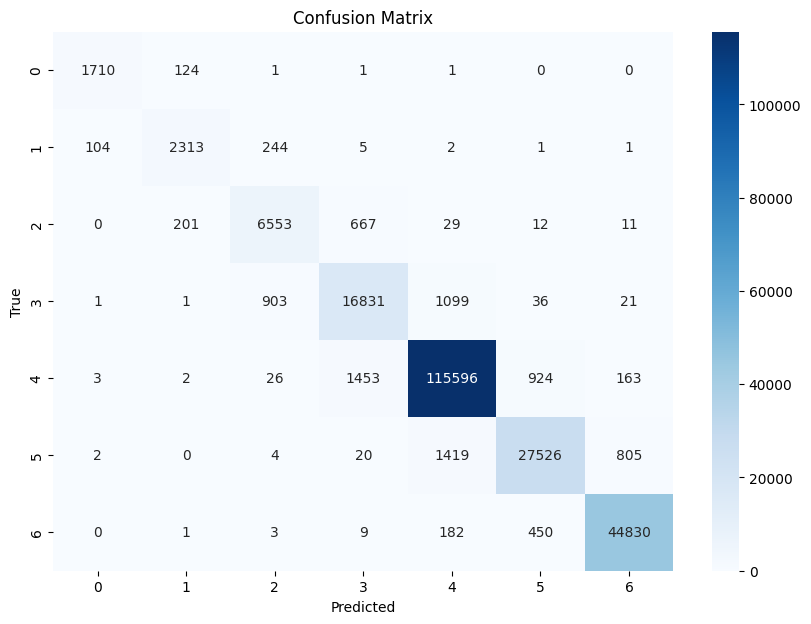

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = xgb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=label_encoder.classes_, 
           yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Observations

- The overall accuracy is very high, indicating strong predictive performance.
- Precision, recall, and F1-score are above 0.84 for all classes, with most above 0.93.
- The model performs best on the most frequent classes (E, F, G), as seen by their high F1-scores.
- Minority classes (A, B, C) have slightly lower scores, which is expected due to class imbalance.
- The confusion matrix shows most predictions are on the diagonal, indicating few misclassifications.
- Feature importance suggests 'Qualification of CO2 emissions' and 'Non-renewable primary energy' are the most influential features.

## Recommendations

- Consider using oversampling or class weighting if further improvement on minority classes is needed.
- Review the most important features for potential domain insights or further feature engineering.

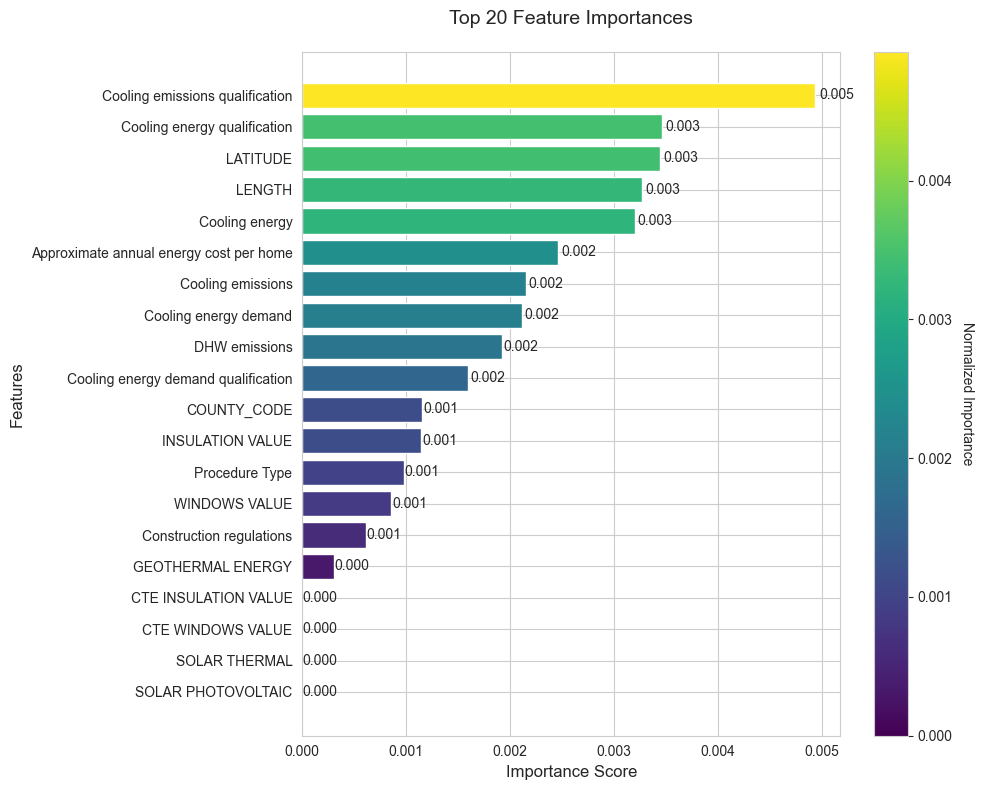

In [28]:

# Get feature importances from the trained XGBoost model
features = selected_feature_name
importance = xgb_classifier.feature_importances_

fi_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values('Importance', ascending=True)
# Sort features by importance (ascending order)
fi_df = fi_df.sort_values('Importance', ascending=False).tail(20)  # Get top 20

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Create horizontal bar plot
bars = plt.barh(fi_df['Feature'], fi_df['Importance'], 
               color=plt.cm.viridis(fi_df['Importance']/fi_df['Importance'].max()))

# Add annotations
for bar in bars:
    width = bar.get_width()
    plt.text(width * 1.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}',
             va='center', ha='left')

# Style adjustments
plt.title('Top 20 Feature Importances', fontsize=14, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()  # Most important at top
plt.tight_layout()

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', 
                         norm=plt.Normalize(vmin=fi_df['Importance'].min(), 
                                         vmax=fi_df['Importance'].max()))
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Normalized Importance', rotation=270, labelpad=15)

plt.show()

**Figure Explanation: Top 20 Feature Importances (XGBoost Model)**

The figure above displays the top 20 most important features used by the XGBoost classifier to predict the *Non-renewable primary energy consumption rating* of buildings. Each horizontal bar represents a feature, and the length of the bar indicates its relative importance in the model's decision-making process.

- **Higher importance** means the feature contributes more to the model's predictions.
- The most influential features (at the top) include:
    - **Qualification of CO2 emissions**
    - **Non-renewable primary energy**
    - **US_BUILDING**
    - **CLIMATIC ZONE**
    - **NAME_PROVINCE**
- Features lower on the list have less impact on the model's output.

This ranking helps identify which building characteristics and energy metrics are most predictive of energy efficiency ratings, guiding both model interpretation and potential feature engineering.

## 🔍 Exploratory Actions Based on Model Evaluation and Feature Importance

Based on the insights from the model evaluation and feature importance analysis, here are several recommended next steps for deeper data exploration:

1. **Analyze Feature Distributions**  
   Examine how key features such as `'Qualification of CO2 emissions'` and `'Non-renewable primary energy'` are distributed across the different energy rating classes.

2. **Visualize Feature-Target Relationships**  
   Use boxplots, violin plots, or pairplots to explore how top-ranked features vary with the target energy rating.

3. **Investigate Multicollinearity**  
   Calculate and visualize correlations among top features to detect potential multicollinearity that may affect model performance.

4. **Explore Geospatial Patterns**  
   Map energy ratings or key features using available latitude and longitude data to uncover geographical trends.

5. **Assess Class Imbalance in Detail**  
   Dive deeper into class distributions and consider stratified sampling, SMOTE, or other resampling strategies to balance the dataset.

6. **Analyze Misclassifications**  
   Use the confusion matrix to identify frequently misclassified classes and analyze those samples to find potential patterns or edge cases.

7. **Study Categorical Feature Impact**  
   Evaluate how categorical variables like `'US_BUILDING'` and `'CLIMATIC ZONE'` influence the target variable through grouped visualizations or chi-square tests.

8. **Feature Engineering**  
   Create new features through interactions, ratios, or aggregations of related variables to enhance model learning.

9. **Investigate Temporal Trends**  
   If date/time data is available, explore trends over time—e.g., whether energy ratings have improved over the years.

10. **Review Missing Data Strategies**  
   Reassess how missing values were handled and experiment with different imputation methods to see their impact on model performance.

---

These steps can help refine your model, uncover hidden patterns, and improve both predictive performance and interpretability.


## 3.1.1 SHAP EXPLANATION (XG BOOST)

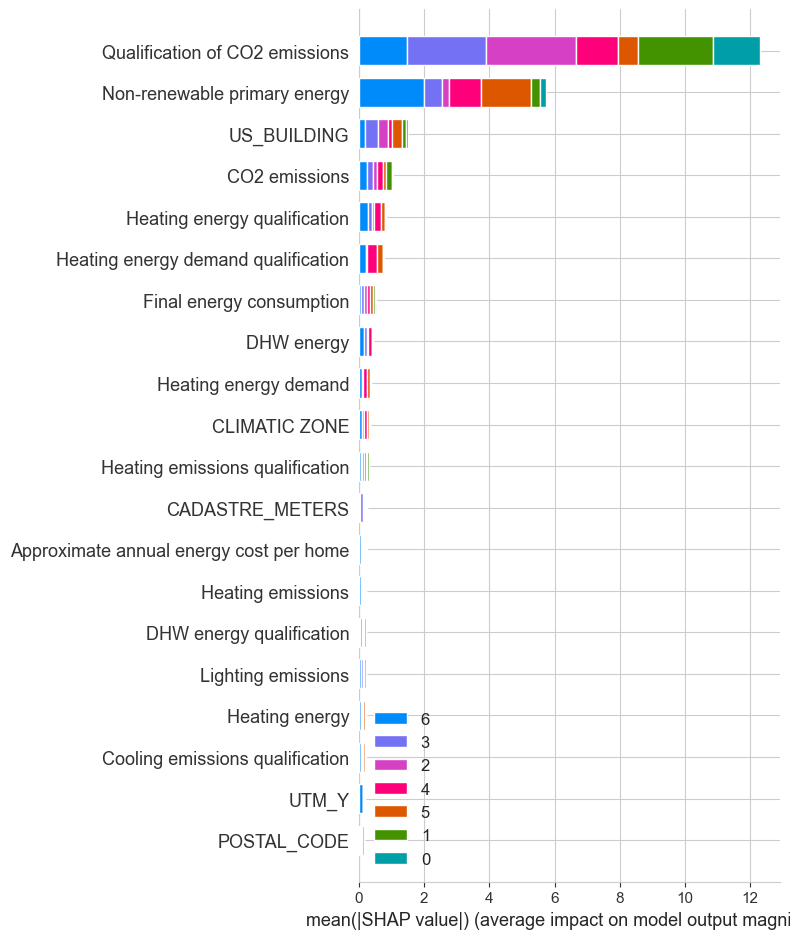

In [29]:
# %pip install shap

import shap

# SHAP explainability (optimized for speed)
explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=selected_feature_name, plot_type='bar', class_names=label_encoder.classes_)


SHAP values for class '0' (class index 0):
Shape: (224290, 45)


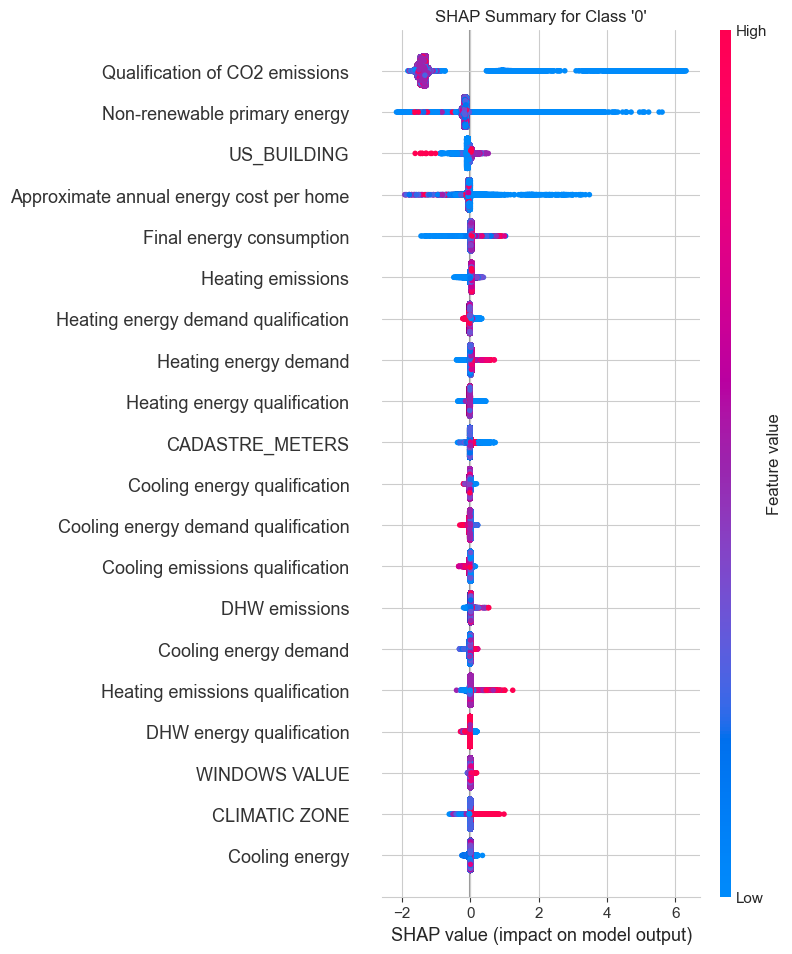


SHAP values for class '1' (class index 1):
Shape: (224290, 45)


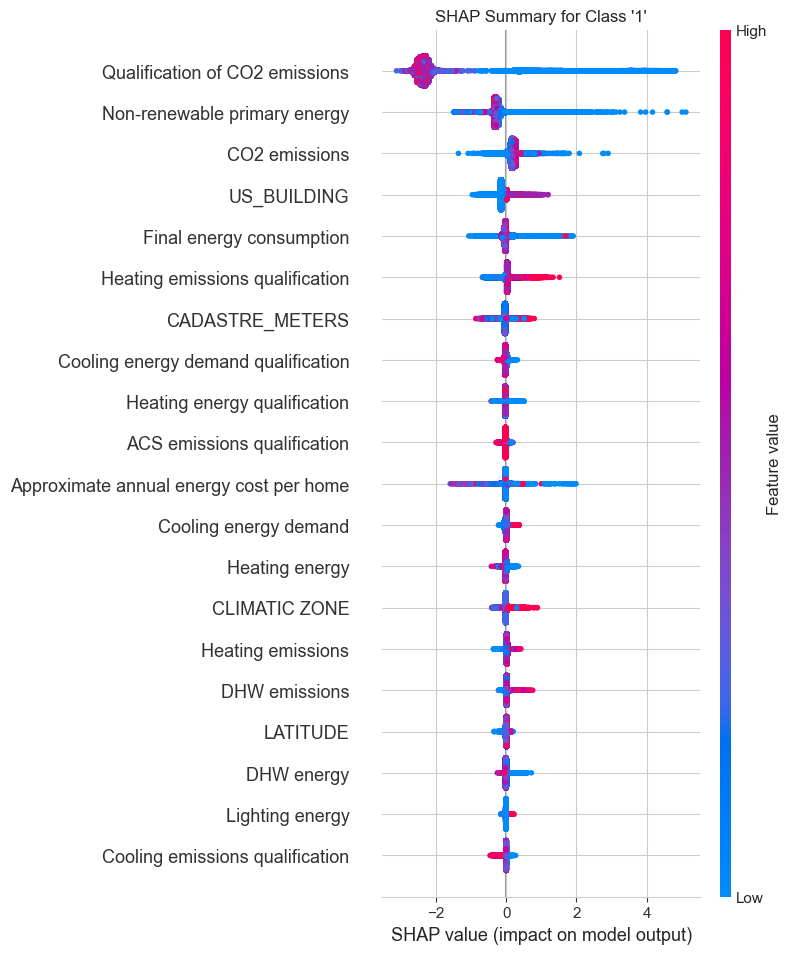


SHAP values for class '2' (class index 2):
Shape: (224290, 45)


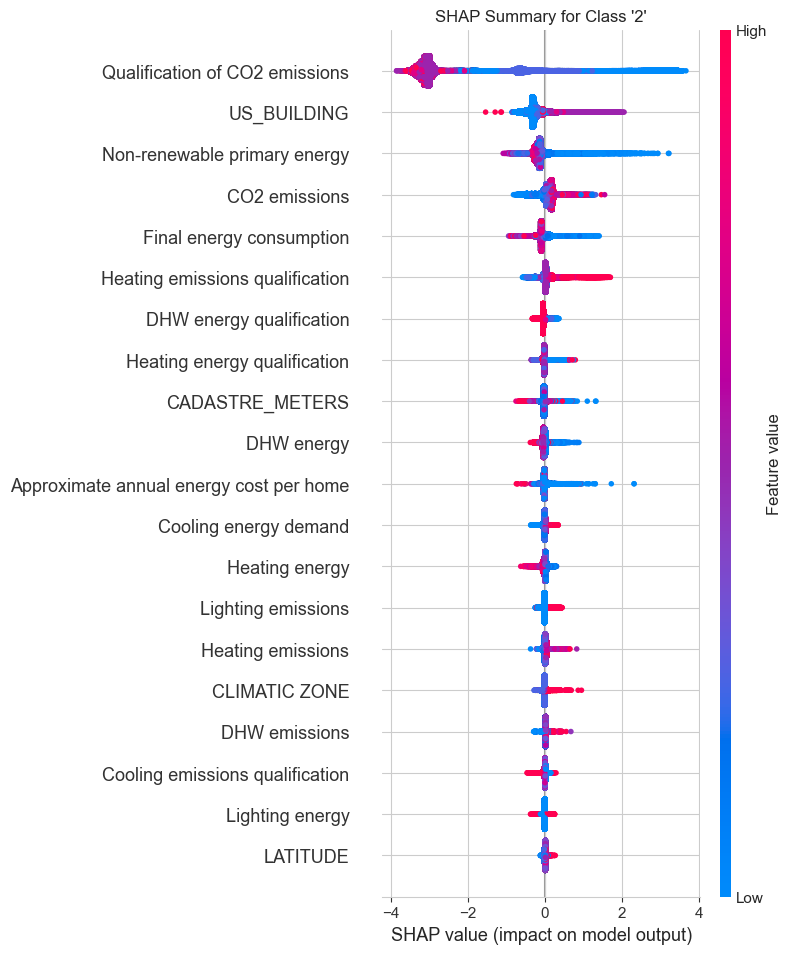


SHAP values for class '3' (class index 3):
Shape: (224290, 45)


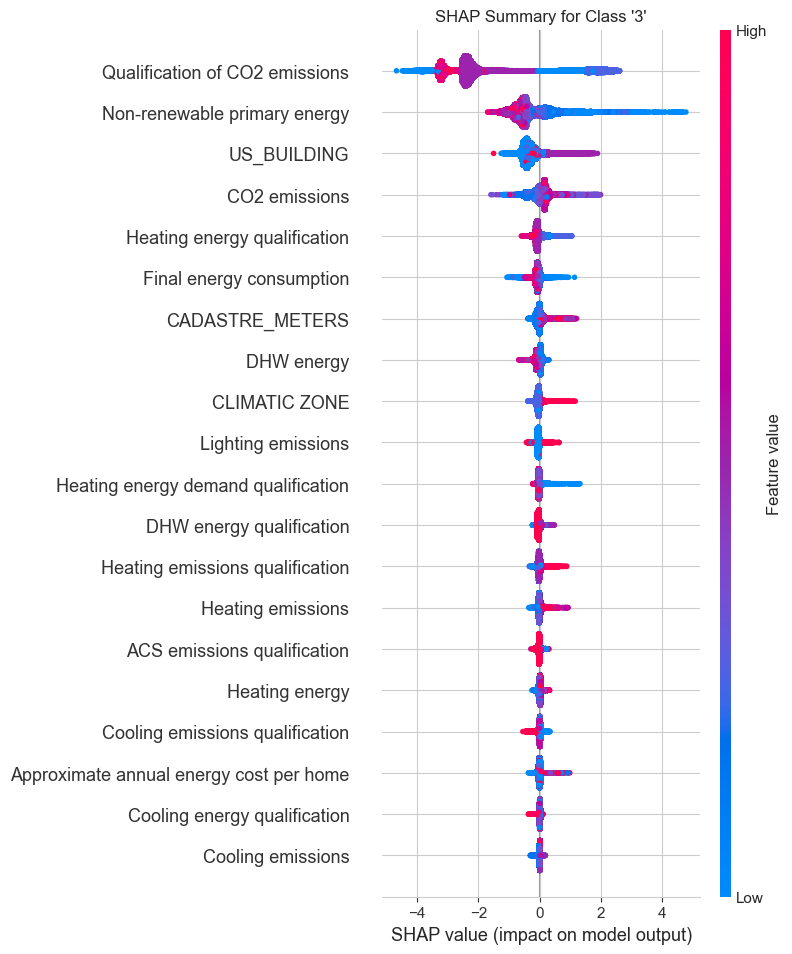


SHAP values for class '4' (class index 4):
Shape: (224290, 45)


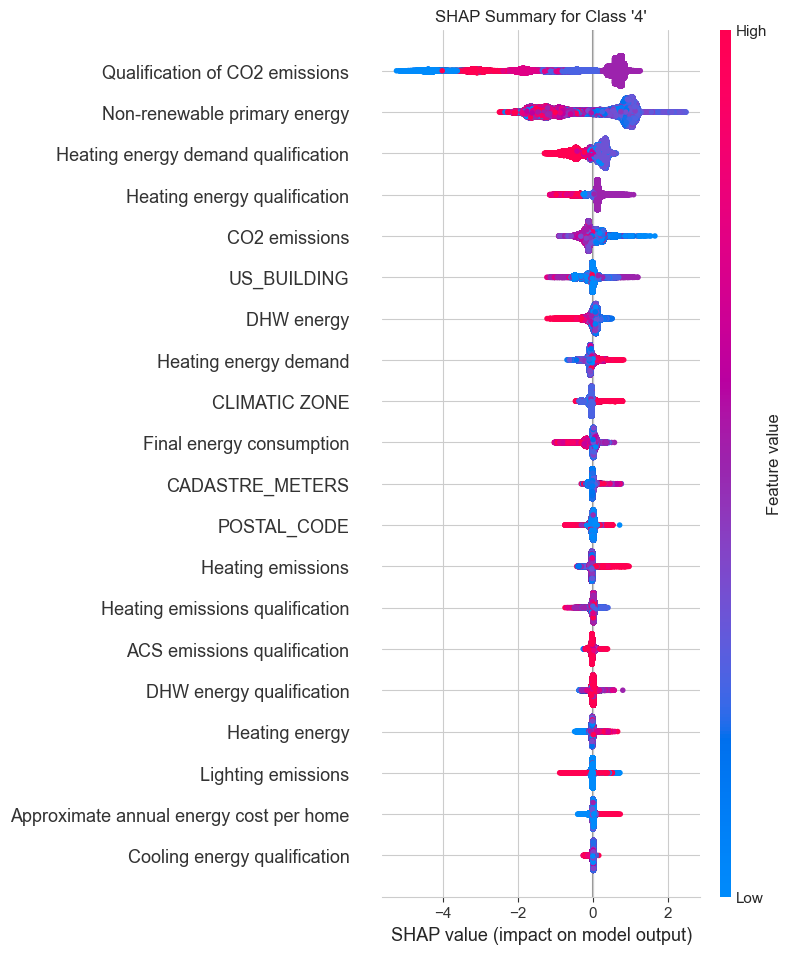


SHAP values for class '5' (class index 5):
Shape: (224290, 45)


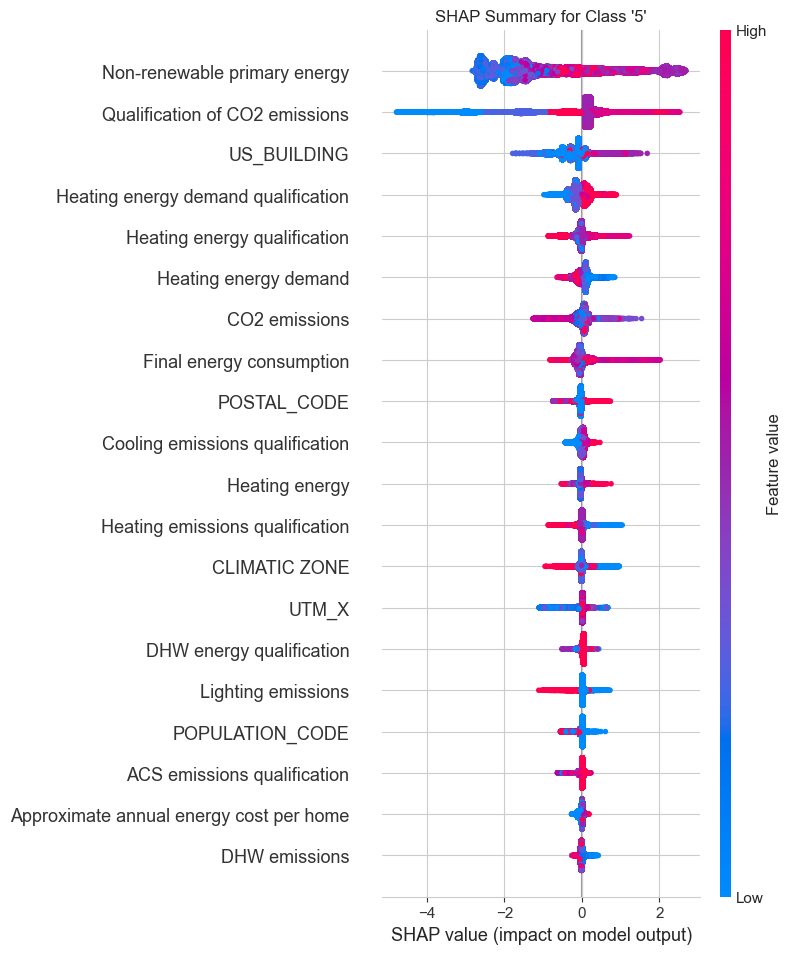


SHAP values for class '6' (class index 6):
Shape: (224290, 45)


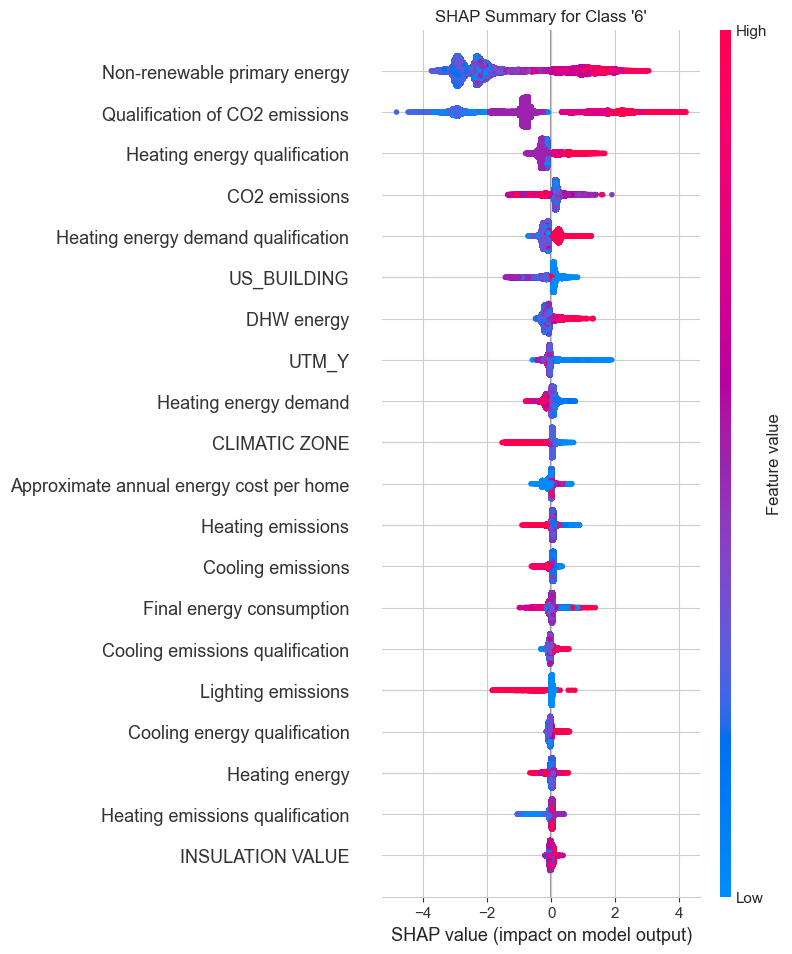

In [30]:
# shap_values is already computed: shap_values = explainer.shap_values(X_test)

for class_idx, class_name in enumerate(label_encoder.classes_):
    print(f"\nSHAP values for class '{class_name}' (class index {class_idx}):")
    # Each element in shap_values corresponds to a class
    class_shap = shap_values[class_idx]
    print(f"Shape: {class_shap.shape}")
    # Show summary plot for this class
    shap.summary_plot(class_shap, X_test, feature_names=selected_feature_name, show=False)
    plt.title(f"SHAP Summary for Class '{class_name}'")
    plt.show()


## Post-Model Analysis and Next Steps

Now that we’ve completed a full cycle — training the model, evaluating its performance, and analyzing how it behaves based on the data — it’s a good time to reflect and plan forward.

### Review of SHAP Value Insights

One key area to focus on is the **SHAP value analysis**, particularly for the most influential feature:  
**`Non-renewable primary energy`**.

Pay specific attention to:

- **The direction of the SHAP value distribution**:  
  - Does most of the distribution lie to the **left** (indicating a negative impact on prediction) or to the **right** (positive impact)?
  - Some classes are skewed to the left, while others are skewed to the right. Can you explain this behavior?
  - Should it be like this? If so, why? If not, what could be causing this?

Learn More About SHAP Values

To better understand how SHAP values work and how to interpret them effectively, check out the following tutorials and guides:

1. **[SHAP Beeswarm Plot Example (official SHAP docs)](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html)**  
   A practical example of the beeswarm plot, showing how SHAP values highlight feature impact across predictions.

2. **[Your Intuitive Guide to Interpret SHAP's Beeswarm Plot – by Deena Gergis](https://www.linkedin.com/pulse/your-intuitive-guide-interpret-shaps-beeswarm-plot-deena-gergis-1jw9f/)**  
   A great beginner-friendly explanation that breaks down how to read and reason about SHAP beeswarm plots.

3. **[Understanding SHAP Explanations in Healthcare Models (PubMed)](https://pmc.ncbi.nlm.nih.gov/articles/PMC11513550/)**  
   A research article that explores SHAP values in a real-world context, particularly in medical predictive models.

4. **[Interpretable Machine Learning – SHAP Chapter by Christoph Molnar](https://christophm.github.io/interpretable-ml-book/shap.html)**  
   A deeper dive into the theory behind SHAP, how it works, and why it's grounded in Shapley values from cooperative game theory.




### Next Steps
One of the next important steps is to take a **critical look at which features you're including in your model**. 

Don't just go with the features that give you the highest accuracy — you might end up with a very accuracte model that is not very useful. Instead, think about it this way:

- What features actually make sense for the problem you're solving?
- Which ones align with your **domain knowledge** in building energy retrofitting?
- Are there any features that might be influencing the model too much or in the wrong way? 
- Does it make sense to include the ratings for CO₂ emissions and non-renewable primary energy consumption? Are they inputs or outputs?
- If you cannot change a feature, like the location of the building, should you include it in the model? What happens if you remove it? 


Remember, your goal isn't just to build a model that performs well — it's to build one that makes sense, is interpretable, and can give you **actionable insights**. So use your expertise to decide which features **should** be included.

Here are some other potential next steps:

- Review the **feature scaling** or **preprocessing strategy**
- Re-express this feature or even isolate cases where misclassification correlates with specific SHAP patterns
- Try a different XAI technique that is known to provide actionable suggestions. Justify your choice using the appropriate literature.
---

Understanding *why* the model reacts to certain feature values in the way it does is key to refining its performance and trustworthiness. Let this guide your next round of improvements.




---
## What We Expect in Your Notebook

The beauty of a Jupyter notebook is that you can blend **code, explanations, and references** in one place. To help us follow your work (and give better feedback), please do the following:

1. **Explain What You’re Doing — and Why**  
   - Add a brief note **before each code cell** describing *why* you’re running that code.  
   - State the goal in plain language (e.g., “Training an XGBoost model to predict EPC ratings”).

2. **Keep Your Code Commented**  
   - Use clear inline comments (`# like this`) so we know what each block does.  
   - LLM‐generated comments are fine—just make sure they’re meaningful.

3. **Show *and* Explain Your Results**  
   - After each major step, print or plot the results.  
   - Directly below, add a short explanation of what those numbers/plots mean. 
   - Add you own interpretation, not just the LLM’s output. Provide us with your own insights and conclusions.

4. **Back It Up With References**  
   - Link or cite any docs, papers, or blog posts that justify your methods.  
   - A quick Markdown link works great: `[Cool SHAP tutorial](https://shap.readthedocs.io/...)`.

5. **Analyze the Outcomes**  
   - Summarize key observations: “Class E dominates the dataset, so we tried SMOTE.”  
   - Mention any new questions the results raise or next steps you’d explore.

Follow these points and we’ll easily understand your workflow, see the logic behind your choices, and provide more useful guidance. 🚀
